# ARMA Model

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from statsmodels.tsa.arima_model import ARIMA,ARMA,ARIMAResults,ARMAResults

In [7]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [8]:
from pmdarima import auto_arima

In [9]:
df1 = pd.read_csv('../Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)

In [10]:
df1.index.freq = 'D'

In [11]:
df1

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [12]:
# Grabbing only first 4 months of data for now

In [13]:
df1 = df1[:120]

In [14]:
df1

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-04-26,35
1959-04-27,40
1959-04-28,42


In [15]:
df2 = pd.read_csv('../Data/TradeInventories.csv',index_col='Date',parse_dates=True)

In [16]:
df2.index.freq = 'MS'

# ARMA Code

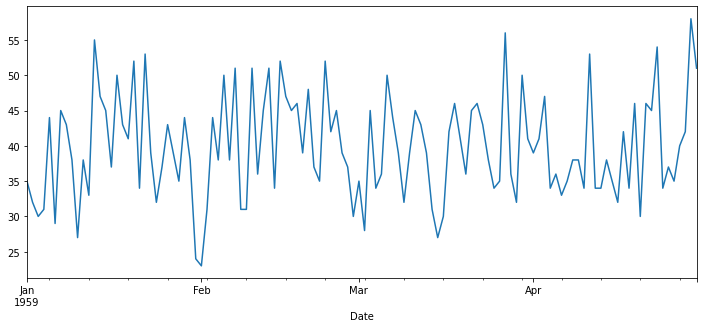

In [17]:
df1['Births'].plot(figsize=(12,5))

In [18]:
#Running Dickey fuller test to check the stationarity
from statsmodels.tsa.stattools import adfuller

In [19]:
#Running Dickey fuller test to check the stationarity

from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [27]:
## calling autoarima

auto_arima(df1['Births'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                        SARIMAX   Log Likelihood                -409.745
Date:                Fri, 07 Jan 2022   AIC                            823.489
Time:                        13:24:37   BIC                            829.064
Sample:                             0   HQIC                           825.753
                                - 120                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.7833      0.687     57.896      0.000      38.437      41.130
sigma2        54.1197      8.319      6.506      0.000      37.815      70.424
===================================================================================
Ljung-Box (Q):                       44.41   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.29   Prob(JB):                         0.26
Heteroskedasticity (H):               0.80   Skew:                             0.26
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

as we have 4 months of data we will forecast for 1 month and will take 1 month data as test data

In [28]:
train = df1.iloc[:90]

In [29]:
test = df1[90:]

In [30]:
from statsmodels.tsa.arima_model import ARMA,ARIMA,ARMAResults,ARIMAResults

In [32]:
model = ARMA(train['Births'],order=(2,2))

In [34]:
results = model.fit()

In [35]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                     ARMA(2, 2)   Log Likelihood                -307.905
Method:                       css-mle   S.D. of innovations              7.405
Date:                Fri, 07 Jan 2022   AIC                            627.809
Time:                        13:25:13   BIC                            642.808
Sample:                    01-01-1959   HQIC                           633.858
                         - 03-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.7549      0.912     43.607      0.000      37.968      41.542
ar.L1.Births    -0.1850      1.087     -0.170      0.865      -2.315       1.945
ar.L2.Births     0.4352      0.644      0.675      0.500      -0.828       1.698
ma.L1.Births     0.2777      1.097      0.253      0.800      -1.872       2.427
ma.L2.Births    -0.3999      0.679     -0.589      0.556      -1.730       0.930
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3181           +0.0000j            1.3181            0.5000
AR.2            1.7434           +0.0000j            1.7434            0.0000
MA.1           -1.2718           +0.0000j            1.2718            0.5000
MA.2            1.9662           +0.0000j            1.9662            0.0000
-----------------------------------------------------------------------------
"""

In [36]:
start = len(train)
end = len(train) + len(test) -1

In [37]:
predictions = results.predict(start,end).rename('ARMA(2,2) Predictions')

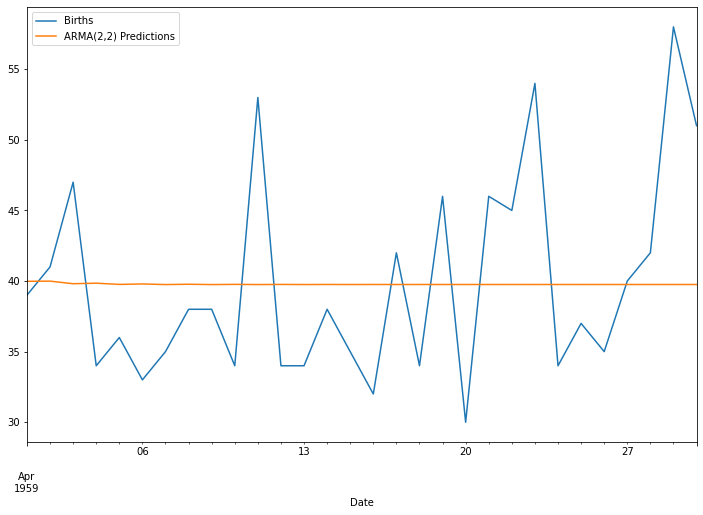

In [38]:
test['Births'].plot(figsize=(12,8),legend=True)
predictions.plot(legend =True)

Here we are seeing our predicted values with our test values. As there was no seasonal trend ARMA with (2,2) is predicting avg for next month

In [40]:
test,predictions

(            Births
 Date              
 1959-04-01      39
 1959-04-02      41
 1959-04-03      47
 1959-04-04      34
 1959-04-05      36
 1959-04-06      33
 1959-04-07      35
 1959-04-08      38
 1959-04-09      38
 1959-04-10      34
 1959-04-11      53
 1959-04-12      34
 1959-04-13      34
 1959-04-14      38
 1959-04-15      35
 1959-04-16      32
 1959-04-17      42
 1959-04-18      34
 1959-04-19      46
 1959-04-20      30
 1959-04-21      46
 1959-04-22      45
 1959-04-23      54
 1959-04-24      34
 1959-04-25      37
 1959-04-26      35
 1959-04-27      40
 1959-04-28      42
 1959-04-29      58
 1959-04-30      51,
 1959-04-01    39.982224
 1959-04-02    39.992613
 1959-04-03    39.809831
 1959-04-04    39.848174
 1959-04-05    39.761539
 1959-04-06    39.794256
 1959-04-07    39.750501
 1959-04-08    39.772835
 1959-04-09    39.749662
 1959-04-10    39.763668
 1959-04-11    39.750992
 1959-04-12    39.759433
 1959-04-13    39.752355
 1959-04-14    39.757338
 1959-04-

In [41]:
test.mean()

Births    39.833333
dtype: float64

In [42]:
predictions.mean()

39.777435250726874

Plotting inventory data set and will check the stationary 

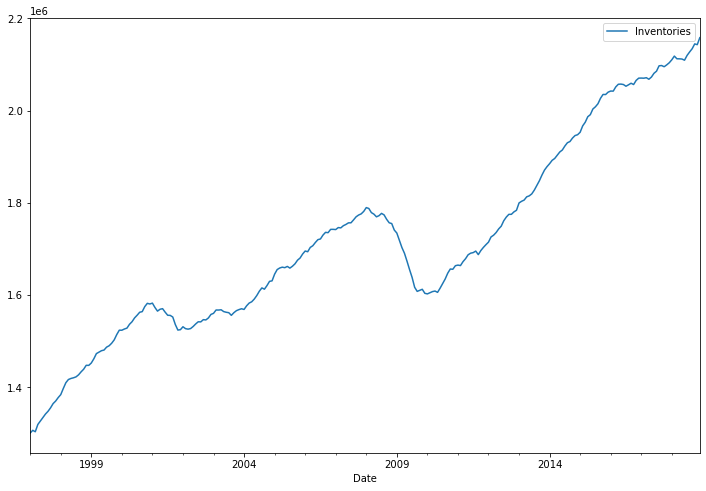

In [44]:
df2.plot(figsize=(12,8))

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [46]:
results = seasonal_decompose(df2['Inventories'],model='add')

<Figure size 864x576 with 0 Axes>

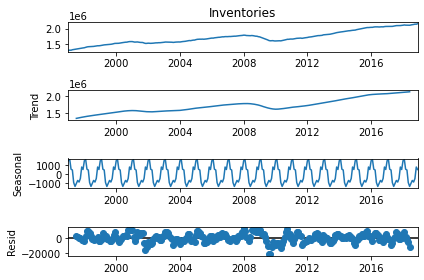

In [55]:
plt.figure(figsize=(12,8))
results.plot();
plt.show()

Here we are ignoring seasonal values as these are too small

In [59]:
auto_arima(df2['Inventories'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Fri, 07 Jan 2022   AIC                           5348.037
Time:                        13:37:37   BIC                           5355.181
Sample:                             0   HQIC                          5350.908
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (Q):                      455.75   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
from statsmodels.tsa.statespace.tools import diff

In [61]:
df2['Diff_1'] = diff(df2['Inventories'],k_diff=1)

In [62]:
adf_test(df2['Diff_1'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -3.412249
p-value                   0.010548
# lags used               4.000000
# observations          258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


Pacf and ACF values

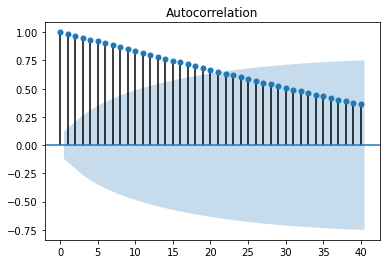

In [63]:
plot_acf(df2['Inventories'],lags=40);

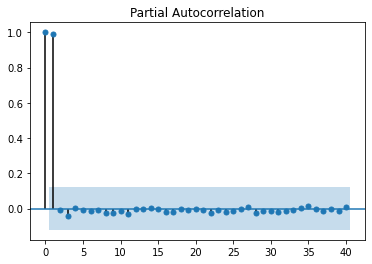

In [64]:
plot_pacf(df2['Inventories'],lags=40);

In [65]:
## how to  choose p and q from the above graphs

d value -- we will take the difference until the data gets stationary

AR Terms: 
    PACF -- If pacf plot shows sharp cut off, then consider adding AR term to the model,
    The lag at which we can see sharp drop (cut off ) we can consider that value as value of AR term
    So we have lag of 0,lag of1 and then cutoff happends after lag of 1, so we will take 1 as value for AR term
    
    
MA Term:
    ACF plot: 
        our pacf has sharp drop and acf plot shows gradual decline.. so our model can use AR term only, adding MA wont be that much helpful.
        so we can consider MA term as 0 or 1
    


In [66]:
#AR = 1
#I = 1
#MA = 0 or 1

In [69]:
stepwise_fit = auto_arima(df2['Inventories'],start_p=0,start_q=0,max_p=2,max_q=2,
                         seasonal=False,trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5348.037, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5399.843, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5350.241, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5409.217, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5378.835, Time=0.16 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.272 seconds


In [70]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Fri, 07 Jan 2022   AIC                           5348.037
Time:                        13:50:00   BIC                           5355.181
Sample:                             0   HQIC                          5350.908
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (Q):                      455.75   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [71]:
len(df2)

264

In [72]:
train = df2.iloc[:252]
test = df2.iloc[252:]

In [73]:
model = ARIMA(train['Inventories'],order=(1,1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Inventories   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2486.397
Method:                       css-mle   S.D. of innovations           4845.095
Date:                Fri, 07 Jan 2022   AIC                           4980.794
Time:                        13:52:02   BIC                           4994.896
Sample:                    02-01-1997   HQIC                          4986.469
                         - 12-01-2017                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3172.1861   1341.422      2.365      0.018     543.047    5801.325
ar.L1.D.Inventories     0.9029      0.039     23.135      0.000       0.826       0.979
ma.L1.D.Inventories    -0.5607      0.079     -7.131      0.000      -0.715      -0.407
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1076           +0.0000j            1.1076            0.0000
MA.1            1.7836           +0.0000j            1.7836            0.0000
-----------------------------------------------------------------------------
"""

In [74]:
start = len(train)
end = len(train) + len(test) -1

In [76]:
predictions = results.predict(start=start,end=end,typ='levels').rename('ARIMA(1,1,1) Predictions' )

In [77]:
predictions

2018-01-01    2.107141e+06
2018-02-01    2.110509e+06
2018-03-01    2.113859e+06
2018-04-01    2.117191e+06
2018-05-01    2.120507e+06
2018-06-01    2.123810e+06
2018-07-01    2.127100e+06
2018-08-01    2.130379e+06
2018-09-01    2.133647e+06
2018-10-01    2.136906e+06
2018-11-01    2.140156e+06
2018-12-01    2.143399e+06
Freq: MS, Name: ARIMA(1,1,1) Predictions, dtype: float64

In [78]:
test

,Inventories,Diff_1
Date,,
2018-01-01,2110158,6407.0
2018-02-01,2118199,8041.0
2018-03-01,2112427,-5772.0
2018-04-01,2112276,-151.0
2018-05-01,2111835,-441.0
2018-06-01,2109298,-2537.0
2018-07-01,2119618,10320.0
2018-08-01,2127170,7552.0
2018-09-01,2134172,7002.0


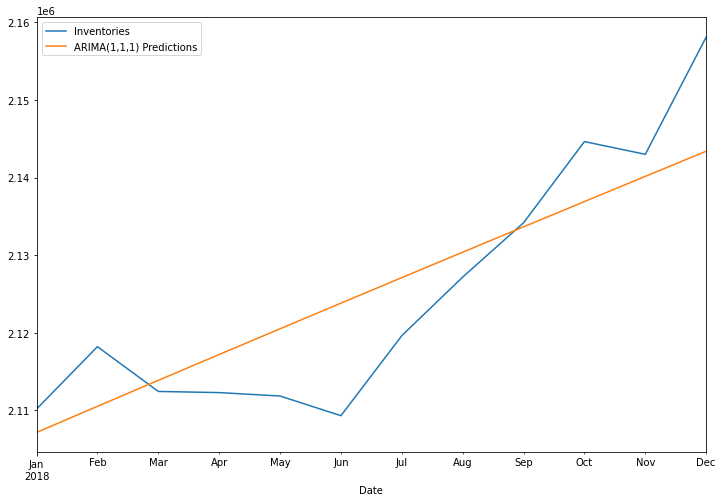

In [79]:
test['Inventories'].plot(legend=True,figsize=(12,8))
predictions.plot(legend=True)

we have seasonal components which we have ignore that is why we are seeing plot like this
our prediction is showing only general trend not the seasonal one

#### Evaluating our model

In [81]:
from statsmodels.tools.eval_measures import rmse

In [82]:
error = rmse(test['Inventories'],predictions)

In [83]:
error

7806.338872274433

In [84]:
test['Inventories'].mean()

2125075.6666666665

In [85]:
predictions.mean()

2125383.534654713

#### Forecasting into unknown future

In [86]:
model = ARIMA(df2['Inventories'],order=(1,1,1))

In [87]:
results = model.fit()

In [88]:
fcast = results.predict(start=len(df2),end=len(df2)+11,typ='levels').rename('ARIMA (1,1,1) Forecast')

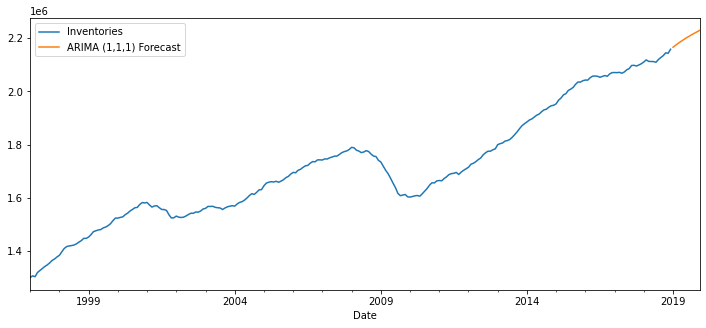

In [90]:
df2['Inventories'].plot(legend=True,figsize=(12,5))
fcast.plot(legend=True)